###**Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
homeprices = {'area':[2600,3000,3200,3600,4000],'price':[550000,565000,610000,680000,725000]}
df =  pd.DataFrame(homeprices)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


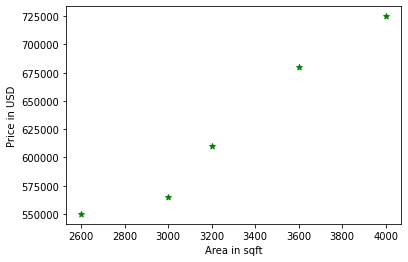

In [ ]:
plt.xlabel("Area in sqft")
plt.ylabel("Price in USD")
plt.scatter(df.area,df.price,color = 'green', marker = '*')
x = df.area
y = df.price

In [ ]:
linear = linear_model.LinearRegression()
linear.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
print('coefficient of the linear model:',linear.coef_, "\nintercept of the linear model is:",linear.intercept_)

coefficient of the linear model: [135.78767123] 
intercept of the linear model is: 180616.43835616432


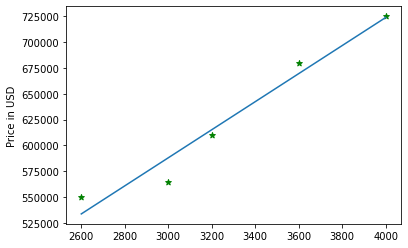

In [ ]:
plt.ylabel("Price in USD")
plt.scatter(df.area,df.price,color = 'green', marker = '*')
m = linear.coef_
b = linear.intercept_
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

###**Save the model to a file**

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as f:
  pickle.dump(linear,f)

In [ ]:
with open('model_pickle','rb') as f:
  mp = pickle.load(f)

In [ ]:
mp.predict([[5000]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [ ]:
import joblib

In [ ]:
joblib.dump(linear,'linear_joblib')

['linear_joblib']

In [ ]:
lj = joblib.load('linear_joblib')

In [ ]:
lj.predict([[5000]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

###**More examples on Linear Regression**

In [ ]:
area = pd.read_csv("/content/drive/MyDrive/Practice/area - Sheet1.csv")

In [ ]:
predicted = linear.predict(area)

In [ ]:
area['prices'] = predicted
area.to_csv("predict.csv")

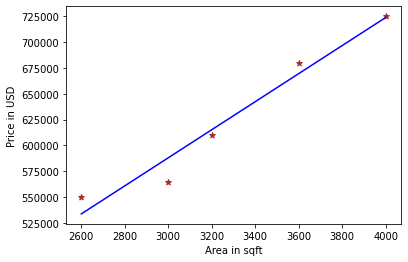

In [ ]:
plt.xlabel("Area in sqft")
plt.ylabel("Price in USD")
plt.scatter(df.area,df.price,color = 'brown', marker = '*')
plt.plot(df.area,linear.predict(df[['area']]),color='blue')

In [ ]:
canada_percapita = pd.read_csv("/content/drive/MyDrive/Practice/canada_2020_per_capita - Sheet1.csv")
canada_percapita.count()

year                       47
per capita income (US$)    47
dtype: int64

Text(0, 0.5, 'GDP per capita')

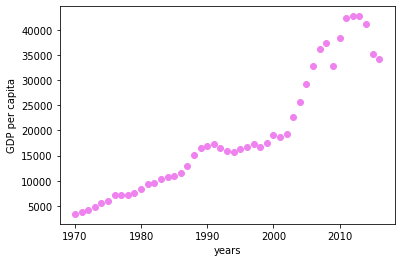

In [ ]:
plt.scatter(canada_percapita.year,canada_percapita['per capita income (US$)'],color = 'violet')
plt.xlabel("years")
plt.ylabel("GDP per capita")

In [ ]:
linear = linear_model.LinearRegression()
linear.fit(canada_percapita[['year']],canada_percapita['per capita income (US$)'])

LinearRegression()

In [ ]:
print('coefficient of the linear model:',linear.coef_, "\nintercept of the linear model is:",linear.intercept_)

coefficient of the linear model: [828.46507522] 
intercept of the linear model is: -1632210.7578554575


In [ ]:
linear.predict([[2020]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [ ]:
x = canada_percapita.year
y = canada_percapita['per capita income (US$)']

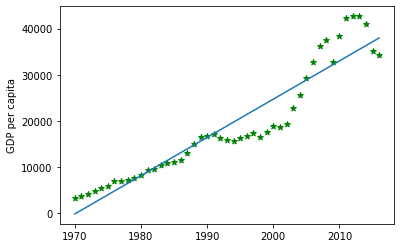

In [ ]:
plt.ylabel("GDP per capita")
plt.scatter(canada_percapita.year,canada_percapita['per capita income (US$)'],color = 'green', marker = '*')
m = linear.coef_
b = linear.intercept_
m, b = np.polyfit(x, y, 1)
plt.plot(x,m*x+b)

Text(0, 0.5, 'GDP per capita')

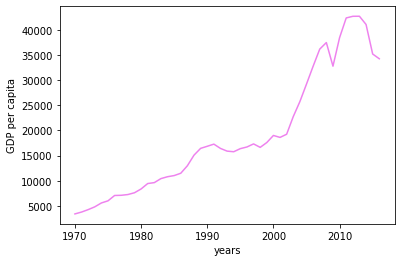

In [ ]:
plt.plot(canada_percapita.year,canada_percapita['per capita income (US$)'],color = 'violet')
plt.xlabel("years")
plt.ylabel("GDP per capita")
# plt.scatter(canada_percapita.year,linear.predict(canada_percapita[['per capita income (US$)']]),color='blue')

###**Multivariate linear regression**


In [ ]:
# already imported the wanted packages

In [ ]:
house_price = pd.read_csv('/content/drive/MyDrive/Practice/multivariate_house_prices - Sheet1.csv')
house_price

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
import math
house_price.fillna(math.floor(house_price['bedrooms'].mean()),inplace=True)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(house_price[['area','bedrooms','age']],house_price['price'])

LinearRegression()

In [ ]:
reg.predict([[3000,3,40]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
reg.predict([[2500,4,5]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [ ]:
hiring = pd.read_csv('/content/drive/MyDrive/Practice/hiring - Sheet1.csv')
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
hiring['test_score(out of 10)'].fillna(math.floor(hiring['test_score(out of 10)'].mean()),inplace=True)
hiring['experience'].fillna('zero',inplace=True)
# d.experience = d.experience.fillna("zero")
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=0bbc201f5af299e7d67763fe9900628c0c99cbc0138085a0bc1ced49d192c148
  Stored in directory: /root/.cache/pip/wheels/cb/f3/5a/d88198fdeb46781ddd7e7f2653061af83e7adb2a076d8886d6
Successfully built word2number


In [ ]:
from word2number import w2n
hiring.experience = hiring.experience.apply(w2n.word_to_num)

In [ ]:
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(hiring[['experience','test_score(out of 10)','interview_score(out of 10)']],hiring['salary($)'])

LinearRegression()

In [ ]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [ ]:
reg.intercept_

14992.65144669314

In [ ]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [ ]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

###**Gradient Descent**


In [ ]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
example = pd.read_csv('/content/drive/MyDrive/Practice/Gradient_descent - Sheet1.csv')

In [ ]:
example

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(example[['math']],example['cs'])

LinearRegression()

In [ ]:
reg.coef_

array([1.01773624])

In [ ]:
reg.intercept_

1.9152193111569034

In [ ]:
reg.predict([[55]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.89071239])

In [ ]:
import numpy as np


def gradient_descent(x, y):
    m_current = b_current = 0
    iterations = 100
    n = len(x)
    learning_rate = 0.0002
    cost_previous = 0
    for i in range(iterations):
        y_predicted = m_current * x + b_current
        mse = (1 / n) * sum([val ** 2 for val in (y - y_predicted)])
        md = -(2 / n) * sum(x * (y - y_predicted))
        bd = -(2 / n) * sum(y - y_predicted)
        m_current = m_current - learning_rate * md
        b_current = b_current - learning_rate * bd
        # print('slope: ', m_current, 'intercept: ', b_current, 'mse: ', mse, i)
        if math.isclose(mse, cost_previous, rel_tol=1e-20):
            break
        cost_previous = mse
        print ("m {}, b {}, cost {}, iteration {}".format(m_current,b_current,mse, i))

x = np.array(example['math'])
y = np.array(example['cs'])
gradient_descent(x, y)

m 1.9783600000000003, b 0.027960000000000002, cost 5199.1, iteration 0
m 0.20975041279999962, b 0.0030470367999999894, cost 4161.482445460163, iteration 1
m 1.7908456142986242, b 0.025401286955264, cost 3332.2237319269248, iteration 2
m 0.37738163667530467, b 0.005499731626422651, cost 2669.4843523161976, iteration 3
m 1.6409848166378898, b 0.023373894401807944, cost 2139.826383775145, iteration 4
m 0.5113514173939655, b 0.0074774305434828076, cost 1716.5264071567592, iteration 5
m 1.5212165764726306, b 0.021771129698498662, cost 1378.2272007804495, iteration 6
m 0.6184191426785134, b 0.009075514323270572, cost 1107.8601808918404, iteration 7
m 1.4254981563597626, b 0.020507724625171385, cost 891.7842215178443, iteration 8
m 0.7039868810749315, b 0.010370210797388455, cost 719.0974036421305, iteration 9
m 1.3490002310389348, b 0.01951553325074733, cost 581.0869686205, iteration 10
m 0.7723719384951477, b 0.01142244086408669, cost 470.7897237271261, iteration 11
m 1.2878632281408475, b 

###**Hot ecoding**

In [ ]:
town_price = pd.read_csv('/content/drive/MyDrive/Practice/Hot_encoding.csv')
town_price = pd.DataFrame(town_price)

In [ ]:
town_price

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
dummies = pd.get_dummies(town_price.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [ ]:
town_merged = pd.concat([town_price,dummies],axis='columns')
town_merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [ ]:
town_merged.drop(['town','west windsor'], axis=1,inplace=True)

In [ ]:
town_merged

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [ ]:
X = town_merged.drop(['price'],axis=1)
Y = town_merged['price']

In [ ]:
linear = linear_model.LinearRegression()
linear.fit(X,Y)

LinearRegression()

In [ ]:
linear.predict([[2800,0,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([589942.33937398])

In [ ]:
linear.predict([[3400,0,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([680906.09555189])

In [ ]:
linear.score(X,Y)

0.9520497894929525

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
town_price['town'] = label_encoder.fit_transform(town_price['town'])

In [ ]:
town_price

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
X = town_price[['town','area']].values
Y = town_price['price']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [ ]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03]])

In [ ]:
X = X[:,1:]

In [ ]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03]])

In [ ]:
linear.fit(X,Y)

LinearRegression()

In [ ]:
linear.score(X,Y)

0.9520497894929525

In [ ]:
linear.predict([[0,1,3400]])

array([680906.09555187])

In [ ]:
linear.predict([[1,0,2800]])

array([589942.339374])

####**Excercise on one hot encoding**

In [ ]:
cars = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/cars.csv'))

In [ ]:
dummies = pd.get_dummies(cars['model'])

In [ ]:
cars_merged = pd.concat([cars,dummies],axis=1)
cars_merged

,model,miles,price,years,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [ ]:
cars_merged.drop(['model','Mercedez Benz C class'],axis=1,inplace=True)

In [ ]:
cars_merged

,miles,price,years,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [ ]:
X = cars_merged.drop(['price'],axis=1)
Y = cars_merged['price']

In [ ]:
X

,miles,years,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X,Y)

LinearRegression()

In [ ]:
model.score(X,Y)

0.9417050937281082

In [ ]:
model.predict([[45000,4,0,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [ ]:
model.predict([[86000,7,0,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [ ]:
print(model.coef_,'\n',model.intercept_)

[-3.70122094e-01 -1.33245363e+03 -2.45354074e+03 -6.73820733e+03] 
 58976.62596853724


In [ ]:
cars['model'] = label_encoder.fit_transform(cars['model'])
cars

,model,miles,price,years
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [ ]:
X = cars.drop(['price'],axis=1)
Y = cars['price']

In [ ]:
X = ct.fit_transform(X)

In [ ]:
X = X[:,1:]

In [ ]:
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [ ]:
model.fit(X,Y)

LinearRegression()

In [ ]:
model.score(X,Y)

0.9417050937281082

In [ ]:
model.predict([[0,1,45000,4]])

array([36991.31721062])

In [ ]:
model.predict([[1,0,86000,7]])

array([11080.74313219])

In [ ]:
print(model.coef_,'\n',model.intercept_)

[-4.28466659e+03  2.45354074e+03 -3.70122094e-01 -1.33245363e+03] 
 56523.08523128701


###**Test Train Split**

In [ ]:
milage_to_price = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/milage_sell_price.csv'))

In [ ]:
milage_to_price

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = milage_to_price[['Mileage','Age(yrs)']]
Y = milage_to_price['Sell Price($)']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model.score(X_train,Y_train)

0.9303441791492693

In [ ]:
model.predict(X_test)

array([13853.00579669, 28783.33253302, 26630.73353137, 38995.19557078])

In [ ]:
model.score(X_test,Y_test)

0.9285171168662301

###**Logistic Regression**

In [ ]:
insurance = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/insurance.csv'))

In [ ]:
insurance.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Text(0.5, 1.0, 'Plot of insurance buyers')

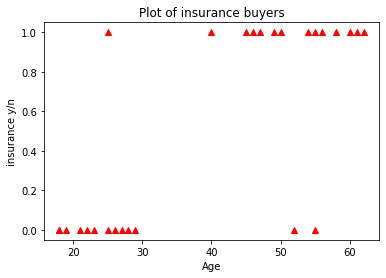

In [ ]:
plt.scatter(insurance.age, insurance.bought_insurance, marker='^', color = 'red')
plt.xlabel('Age')
plt.ylabel('insurance y/n')
plt.title('Plot of insurance buyers')

In [ ]:
X = insurance[['age']]
Y = insurance['bought_insurance']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8)

In [ ]:
X_test

,age
12,27
15,55
23,45
7,60
24,50
3,52


In [ ]:
from sklearn.linear_model import LogisticRegression
model = linear_model.LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model.score(X_train,Y_train)

0.9047619047619048

In [ ]:
model.score(X_test,Y_test)

0.8333333333333334

In [ ]:
model.predict_proba(X_test)

array([[0.82044541, 0.17955459],
       [0.07419696, 0.92580304],
       [0.25352489, 0.74647511],
       [0.03747243, 0.96252757],
       [0.14161759, 0.85838241],
       [0.11000139, 0.88999861]])

In [ ]:
model.predict([[40]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

####**Excercise on Logistic Regression**

In [ ]:
retention = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/retention.csv'))
retention.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
retention.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

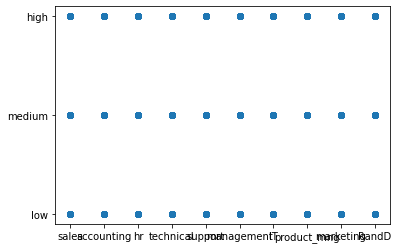

In [ ]:
plt.scatter(retention.Department,retention.salary)

In [ ]:
retention['salary'] = label_encoder.fit_transform(retention['salary'])
retention['Department'] = label_encoder.fit_transform(retention['Department'])

In [ ]:
retention.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [ ]:
left = retention[retention.left == 1]
stay = retention[retention.left == 0]

In [ ]:
retention.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


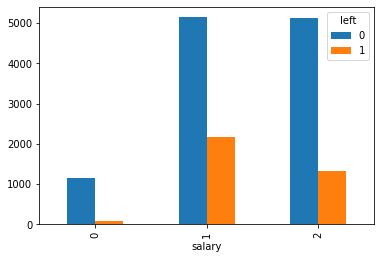

In [ ]:
pd.crosstab(retention.salary,retention.left).plot(kind='bar')

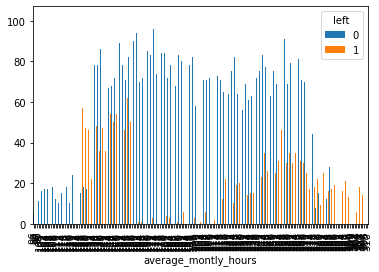

In [ ]:
pd.crosstab(retention.average_montly_hours,retention.left).plot(kind='bar')

In [ ]:
model = linear_model.LogisticRegression()

In [ ]:
X = retention[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
Y = retention[['left']]

In [ ]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
Y_test.head()

,left
5859,0
8260,0
3846,0
6714,0
12005,1


In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_train,Y_train)

0.7733977831485958

In [ ]:
model.score(X_test,Y_test)

0.767

###**Multivatiate Logistic Regression**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

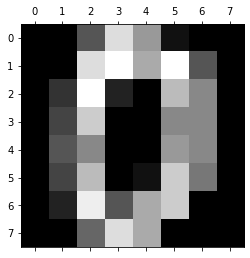

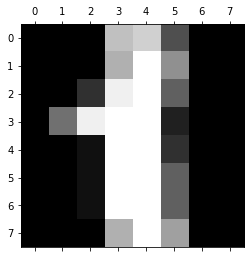

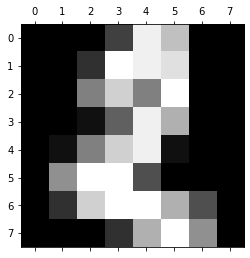

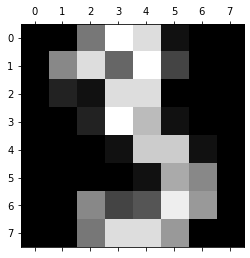

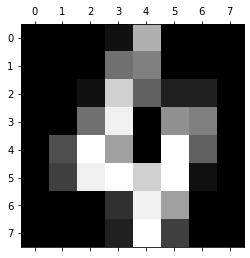

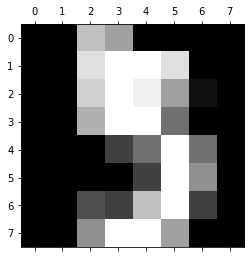

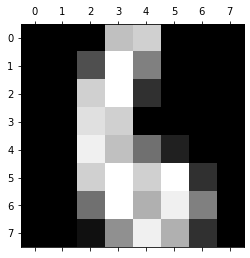

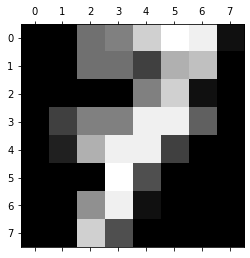

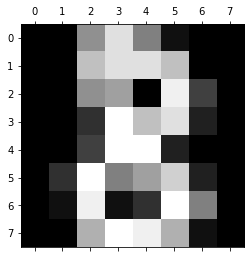

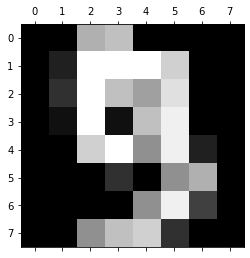

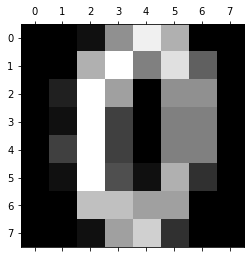

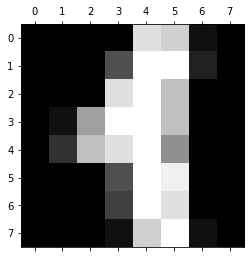

In [ ]:
plt.gray()
for i in range(12):
  plt.matshow(digits.images[i])

In [ ]:
digits.target_names[0:4]

array([0, 1, 2, 3])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [ ]:
len(X_train)

1437

In [ ]:
len(X_test)

360

In [ ]:
model = linear_model.LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_test,Y_test)

0.9527777777777777

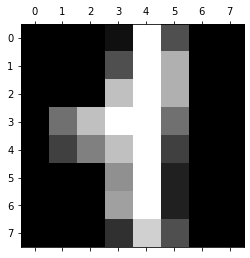

In [ ]:
plt.matshow(digits.images[85])

In [ ]:
digits.target[85]

1

In [ ]:
model.predict([digits.data[85]])

array([1])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
Y_predicted = model.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,Y_predicted)
cm

array([[28,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  3,  1],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 37,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 42,  0,  1],
       [ 0,  4,  0,  0,  0,  0,  0,  1, 29,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  0, 29]])

Text(69.0, 0.5, 'real')

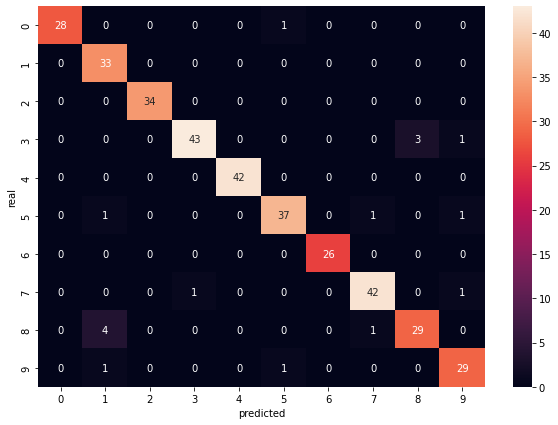

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('real')

####**Excersice on multivariate logistic regression**

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.target[0]

0

In [ ]:
iris.target_names[0]

'setosa'

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
df['target'] = iris.target

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = df.drop('target',axis=1)
Y = df['target']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_test.count()

sepal length (cm)    30
sepal width (cm)     30
petal length (cm)    30
petal width (cm)     30
dtype: int64

In [ ]:
model = linear_model.LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model.score(X_test,Y_test)

1.0

In [ ]:
df.target[15]

0

In [ ]:
model.predict([X.loc[15]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
Y_predicted = model.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,Y_predicted)

Text(51.0, 0.5, 'real')

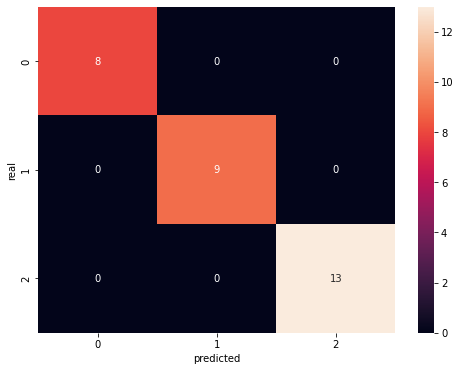

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('real')

###**misc**

In [ ]:
test = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/test.csv'))

In [ ]:
X = test[['x']]
Y = test.y

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = linear_model.LinearRegression()

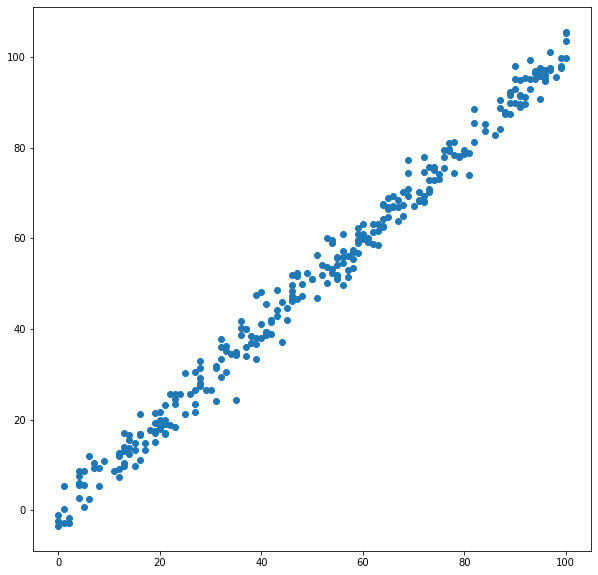

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X,Y)

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model.score(X_test,Y_test)

0.9920097741284474

In [ ]:
model.predict([[58]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58.38074192])

###**Decision Tree**

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/decision.csv'))

In [ ]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
company_encoder = LabelEncoder()
job_encoder = LabelEncoder()
degree_encoder = LabelEncoder()

In [ ]:
df['company'] = company_encoder.fit_transform(df['company'])
df['job'] = job_encoder.fit_transform(df['job'])
df['degree'] = degree_encoder.fit_transform(df['degree'])

In [ ]:
df.head()

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [ ]:
X = df.drop('salary_more_then_100k',axis=1)
Y = df['salary_more_then_100k']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test,Y_test)

0.75

In [ ]:
model.predict([[2,0,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

####**Excercise on titanic**

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/titanic.csv'))

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [ ]:
df.dropna(inplace=True)
# df['Age'].fillna(df['Age'].mean(),inplace=True)
# df.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [ ]:
X = df.drop('Survived',axis=1)
Y = df['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
len(X_train)

571

In [ ]:
len(X_test)

143

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test,Y_test)

0.7762237762237763

In [ ]:
model.score(X_train,Y_train)

0.9877408056042032

In [ ]:
model.predict([[3,1,80,5]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(Y_test,predicted)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81        84\n           1       0.73      0.73      0.73        59\n\n    accuracy                           0.78       143\n   macro avg       0.77      0.77      0.77       143\nweighted avg       0.78      0.78      0.78       143\n'

In [ ]:
plt.figure(figsize=(150,150))

from sklearn import tree

tree.plot_tree(model.fit(X_train, Y_train))

[Text(0.3743407172995781, 0.96875, 'X[1] <= 0.5\ngini = 0.482\nsamples = 571\nvalue = [340, 231]'),
 Text(0.17220464135021096, 0.90625, 'X[0] <= 2.5\ngini = 0.38\nsamples = 208\nvalue = [53, 155]'),
 Text(0.08860759493670886, 0.84375, 'X[3] <= 29.356\ngini = 0.121\nsamples = 124\nvalue = [8, 116]'),
 Text(0.07172995780590717, 0.78125, 'X[3] <= 28.231\ngini = 0.222\nsamples = 55\nvalue = [7, 48]'),
 Text(0.06329113924050633, 0.71875, 'X[2] <= 53.5\ngini = 0.198\nsamples = 54\nvalue = [6, 48]'),
 Text(0.046413502109704644, 0.65625, 'X[2] <= 22.5\ngini = 0.174\nsamples = 52\nvalue = [5, 47]'),
 Text(0.0379746835443038, 0.59375, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.05485232067510549, 0.59375, 'X[2] <= 27.5\ngini = 0.224\nsamples = 39\nvalue = [5, 34]'),
 Text(0.03375527426160337, 0.53125, 'X[2] <= 25.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.016877637130801686, 0.46875, 'X[3] <= 13.75\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.008438818565400843, 0

###**SVM**

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
df = load_iris()

In [ ]:
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target

In [ ]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
flower_name          0
dtype: int64

In [ ]:
X = df.drop(['target','flower_name'],axis=1)
Y = df['target']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
len(X_train)

120

In [ ]:
X_test.shape

(30, 4)

In [ ]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [ ]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


Text(0.5, 1.0, 'versicolor vs setosa vs virginica')

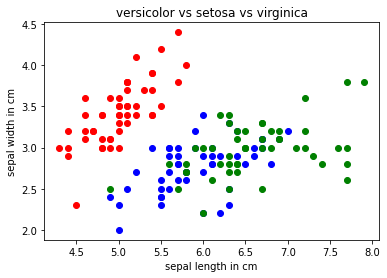

In [ ]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green')
plt.xlabel('sepal length in cm')
plt.ylabel('sepal width in cm')
plt.title('versicolor vs setosa vs virginica')

Text(0.5, 1.0, 'versicolor vs setosa vs virginica')

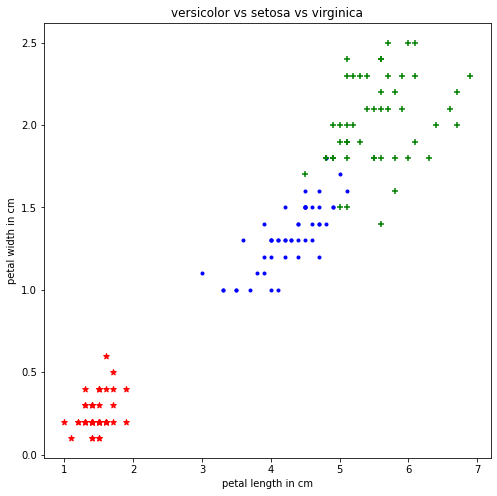

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',marker = '*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker = '.')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green',marker = '+')
plt.xlabel('petal length in cm')
plt.ylabel('petal width in cm')
plt.title('versicolor vs setosa vs virginica')

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel = 'linear')

In [ ]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
model.score(X_test,Y_test)

1.0

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# plt.scatter(df,x=X,y=Y)

####**Excersice on SVM**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

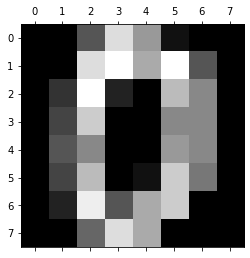

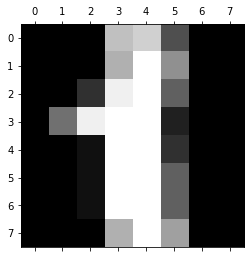

In [ ]:
plt.gray()
for i in range(2):
  plt.matshow(digits.images[i])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(digits.data,digits.target,train_size=0.8)

In [ ]:
model = SVC(kernel = 'rbf')

In [ ]:
model.fit(X_train,Y_train)

SVC()

In [ ]:
model.score(X_test,Y_test)

0.9777777777777777

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        37
           2       0.98      1.00      0.99        44
           3       1.00      0.91      0.95        34
           4       1.00      0.93      0.96        40
           5       0.93      1.00      0.96        39
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        34
           8       0.89      1.00      0.94        34
           9       1.00      0.93      0.96        27

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
cm = confusion_matrix(Y_test,predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 31,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 25]])

Text(0.5, 1.0, 'confusion matrix of the digits')

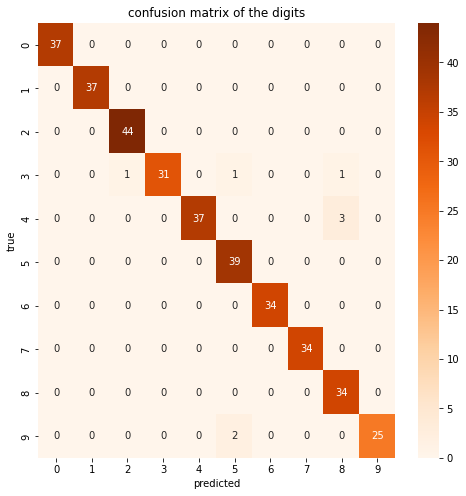

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap='Oranges')
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of the digits')

###**Random Forest**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 432x288 with 0 Axes>

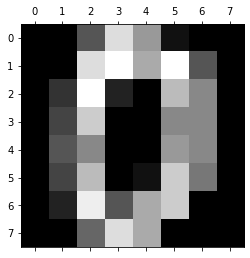

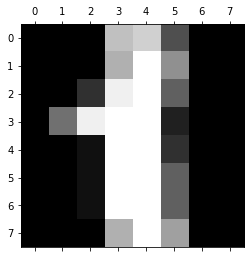

In [ ]:
plt.gray()
for i in range(2):
  plt.matshow(digits.images[i])

In [ ]:
df = pd.DataFrame(digits.data)
df['target'] = pd.DataFrame(digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2)

In [ ]:
len(X_test)

360

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=45)

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=45)

In [ ]:
model.score(X_test,Y_test)

0.9694444444444444

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.92      1.00      0.96        35
           2       1.00      0.97      0.99        37
           3       1.00      0.98      0.99        43
           4       1.00      0.93      0.97        30
           5       0.94      0.94      0.94        33
           6       1.00      0.97      0.99        35
           7       0.95      0.98      0.97        43
           8       0.93      0.93      0.93        29
           9       0.95      0.97      0.96        38

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [ ]:
cm = confusion_matrix(Y_test,predicted)

Text(0.5, 1.0, 'confusion matrix of the digits')

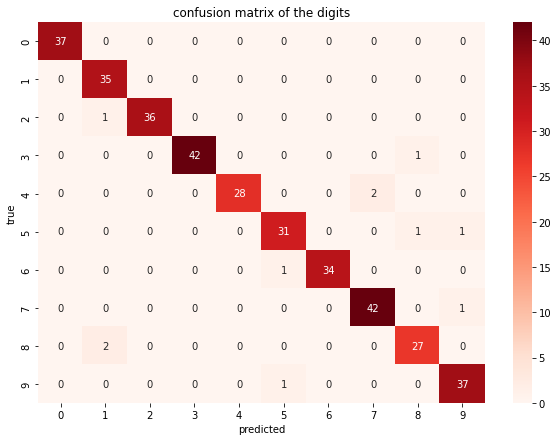

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot = True, cmap = 'Reds')
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of the digits')

####**Excercise on Random Forest**

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['target'] = pd.DataFrame(iris.target)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2)

In [ ]:
model = RandomForestClassifier(n_estimators=10)

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
model.score(X_test,Y_test)

1.0

In [ ]:
predicted = model.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,predicted)

Text(0.5, 1.0, 'confusion matrix of the digits')

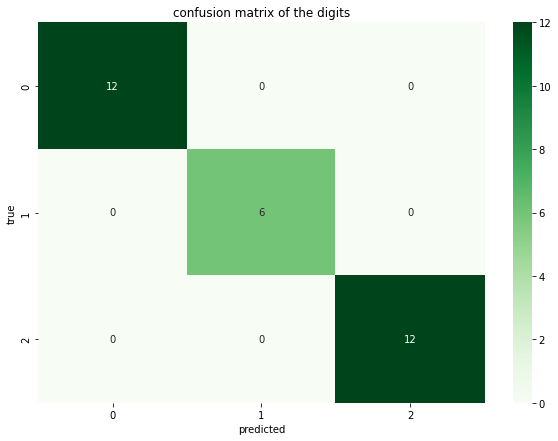

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot = True, cmap = 'Greens')
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of the digits')

###**K Fold Cross_validation**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
X = digits.data
Y = digits.target

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
len(X_train)

1437

In [ ]:
len(X_test)

360

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.56506002848311

In [ ]:
lo = linear_model.LogisticRegression()
lo.fit(X_train,Y_train)
lo.score(X_test,Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9583333333333334

In [ ]:
sv = SVC()
sv.fit(X_train,Y_train)
sv.score(X_test,Y_test)

0.9916666666666667

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)

0.9833333333333333

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
kf = KFold(n_splits=3)

In [ ]:
for train_index,text_index in kf.split([1,2,3,4,5,6,7,8,9]):
  print(train_index,text_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
def get_scores(model,X_train,X_test,Y_train,Y_test):
  model.fit(X_train,Y_train)
  return model.score(X_test,Y_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
kf = StratifiedKFold(n_splits=3)
lin_scores = []
log_scores = []
svm_scores = []
rf_scores = []
for train_index,test_index in kf.split(digits.data,digits.target):
  X_train,X_test,Y_train,Y_test = digits.data[train_index],digits.data[test_index], \
                                  digits.target[train_index],digits.target[test_index]
  lin_scores.append(get_scores(LinearRegression(),X_train,X_test,Y_train,Y_test))
  log_scores.append(get_scores(LogisticRegression(solver='liblinear',multi_class='ovr'),X_train,X_test,Y_train,Y_test))
  svm_scores.append(get_scores(SVC(gamma='auto'),X_train,X_test,Y_train,Y_test))
  rf_scores.append(get_scores(RandomForestClassifier(n_estimators=30),X_train,X_test,Y_train,Y_test))

In [ ]:
np.average(lin_scores)

0.5008147357113392

In [ ]:
np.average(log_scores)

0.9193099610461881

In [ ]:
np.average(svm_scores)

0.4346132442960489

In [ ]:
np.average(rf_scores)

0.9193099610461881

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
logc_scores = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),digits.data,digits.target,cv=3)
np.average(logc_scores)

0.9193099610461881

In [ ]:
svmc_scores = cross_val_score(SVC(gamma='auto'),digits.data,digits.target,cv=3)
np.average(svm_scores)

0.4346132442960489

In [ ]:
rfc_scores = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data,digits.target,cv=10)
np.average(rfc_scores)

0.9482495344506516

####**Excersice on KFold**

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
 X = df.drop('target', axis=1)
 Y = df.target

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
iris_logistic = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X,Y)
round(np.average(iris_logistic),4)

0.96

In [ ]:
iris_dt = cross_val_score(tree.DecisionTreeClassifier(), X,Y)
round(np.average(iris_dt),4)

0.96

In [ ]:
iris_svm = cross_val_score(SVC(gamma = 'auto'),X,Y)
round(np.average(iris_svm),4)

0.98

In [ ]:
iris_rf = cross_val_score(RandomForestClassifier(n_estimators=20),X,Y)
round(np.average(iris_rf),4)

0.96

###**K-Means clustering**

In [ ]:
income = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/income.csv'))

In [ ]:
income.count()

Name         22
Age          22
Income($)    22
dtype: int64

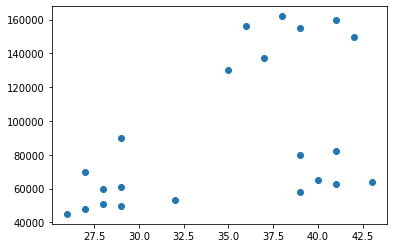

In [ ]:
plt.scatter(income.Age,income['Income($)'])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
km = KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(income[['Age','Income($)']])

In [ ]:
income['cluster'] = y_predicted

In [ ]:
income.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


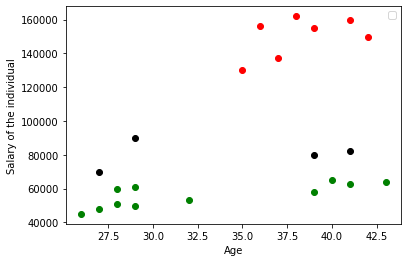

In [ ]:
df0 = income[income.cluster == 0]
df1 = income[income.cluster == 1]
df2 = income[income.cluster == 2]

plt.scatter(df0.Age, df0['Income($)'], color = 'green')
plt.scatter(df1.Age, df1['Income($)'], color = 'red')
plt.scatter(df2.Age, df2['Income($)'], color = 'black')
plt.xlabel('Age')
plt.ylabel('Salary of the individual')
plt.legend()

In [ ]:
sclar = MinMaxScaler()

In [ ]:
sclar.fit(income[['Income($)']])
income['Income($)'] = sclar.transform(income[['Income($)']])

In [ ]:
sclar.fit(income[['Age']])
income['Age'] = sclar.transform(income[['Age']])

In [ ]:
income.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [ ]:
km = KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(income[['Age','Income($)']])

In [ ]:
income['cluster'] = y_predicted
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
income.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [ ]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

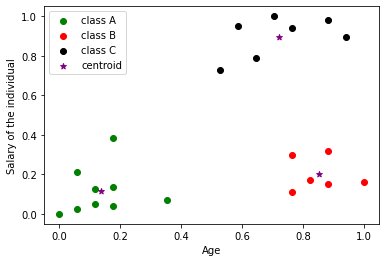

In [ ]:
df0 = income[income.cluster == 0]
df1 = income[income.cluster == 1]
df2 = income[income.cluster == 2]

plt.scatter(df0.Age, df0['Income($)'], color = 'green',label = 'class A')
plt.scatter(df1.Age, df1['Income($)'], color = 'red',label='class B')
plt.scatter(df2.Age, df2['Income($)'], color = 'black',label = 'class C')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Salary of the individual')
plt.legend()

In [ ]:
sse = []
k_range = range(1,10)
for i in k_range:
  km = KMeans(n_clusters=i)
  km.fit(income[['Age','Income($)']])
  sse.append(km.inertia_)

Text(0, 0.5, 'Error')

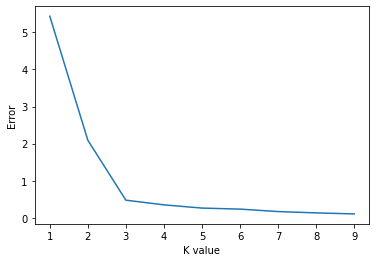

In [ ]:
plt.plot(k_range,sse)
plt.xlabel('K value')
plt.ylabel('Error')

####**Excersice on K Means Clustering**

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


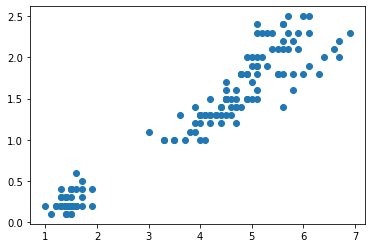

In [ ]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

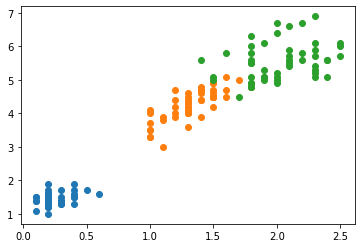

In [ ]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]
plt.scatter(df0['petal width (cm)'],df0['petal length (cm)'])
plt.scatter(df1['petal width (cm)'],df1['petal length (cm)'])
plt.scatter(df2['petal width (cm)'],df2['petal length (cm)'])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
km = KMeans(n_clusters=3)
predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [ ]:
df['target'] = predicted
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df['petal length (cm)'] = sclar.fit_transform(df[['petal length (cm)']])
df['petal width (cm)'] = sclar.fit_transform(df[['petal width (cm)']])
df['sepal length (cm)'] = sclar.fit_transform(df[['sepal length (cm)']])
df['sepal width (cm)'] = sclar.fit_transform(df[['sepal width (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,0.222222,0.625000,0.067797,0.041667,0,setosa
1,0.166667,0.416667,0.067797,0.041667,0,setosa
2,0.111111,0.500000,0.050847,0.041667,0,setosa
3,0.083333,0.458333,0.084746,0.041667,0,setosa
4,0.194444,0.666667,0.067797,0.041667,0,setosa


In [ ]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
km = KMeans(n_clusters=3)
predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])

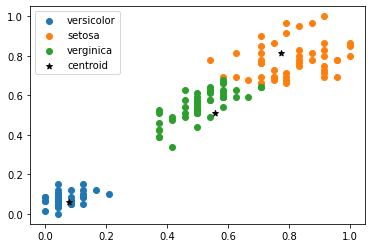

In [ ]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]
plt.scatter(df0['petal width (cm)'],df0['petal length (cm)'],label='versicolor')
plt.scatter(df1['petal width (cm)'],df1['petal length (cm)'],label='setosa')
plt.scatter(df2['petal width (cm)'],df2['petal length (cm)'], label= 'verginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

In [ ]:
sse = []
k_range = range(1,10)
for i in k_range:
  km = KMeans(n_clusters=i)
  km.fit(df[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared error')

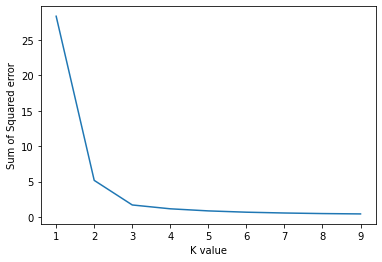

In [ ]:
plt.plot(k_range,sse)
plt.xlabel('K value')
plt.ylabel('Sum of Squared error')

### **Naive Bayes**

In [ ]:
titanic = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/titanic.csv'))

In [ ]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])

In [ ]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [ ]:
titanic.Age.fillna(titanic['Age'].mean(),inplace=True)

In [ ]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [ ]:
X = titanic.drop('Survived',axis=1)
Y = titanic['Survived']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
X_train

,Pclass,Sex,Age,Fare
665,2,1,32.000000,73.5000
242,2,1,29.000000,10.5000
88,1,0,23.000000,263.0000
727,3,0,29.699118,7.7375
215,1,0,31.000000,113.2750
...,...,...,...,...
453,1,1,49.000000,89.1042
120,2,1,21.000000,73.5000
49,3,0,18.000000,17.8000
487,1,1,58.000000,29.7000


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train,Y_train)

GaussianNB()

In [ ]:
model.score(X_test,Y_test)

0.7910447761194029

In [ ]:
spam = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/spam_detection.csv'))

In [ ]:
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
spam['spam'] = spam['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [ ]:
spam.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spam.Message,spam.spam)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test.values)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [ ]:
email = ['hii how are you these many days?','Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!']
email_count = v.transform(email)
model.predict(email_count)

array([0, 1])

In [ ]:
model.score(X_test_count,y_test)

0.9877961234745154

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('vectorizer', CountVectorizer()),('nb',MultinomialNB())])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
y_predicted = clf.predict(X_test)

In [ ]:
clf.score(X_test,y_test)

0.9877961234745154

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1227
           1       0.98      0.92      0.95       166

    accuracy                           0.99      1393
   macro avg       0.98      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



####**Excercise on Naive bayes**

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()

In [ ]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)

In [ ]:
df['target'] = wine.target

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
X = df.drop('target',axis=1)
Y = df['target']

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [ ]:
model = GaussianNB()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
model.fit(X_train,Y_train)

GaussianNB()

In [ ]:
model.score(X_test,Y_test)

0.9814814814814815

In [ ]:
Y_predicted = model.predict(X_test)

In [ ]:
print(classification_report(Y_test,Y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.96      1.00      0.98        23
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
model.score(X_test,Y_test)

0.8888888888888888

In [ ]:
Y_predicted = model.predict(X_test)

In [ ]:
print(classification_report(Y_test,Y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.88      0.96      0.92        23
           2       1.00      0.87      0.93        15

    accuracy                           0.89        54
   macro avg       0.90      0.88      0.89        54
weighted avg       0.89      0.89      0.89        54



###**Grid Search**


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.drop('target',axis=1)
Y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [ ]:
len(X_test)

45

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,50,100],
    'kernel': ['rbf','linear','poly']
}, cv=5, return_train_score=False)
clf.fit(iris.data, iris.target)
result = pd.DataFrame(clf.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001309,0.000243,0.000662,0.000127,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000657,0.000092,0.000314,0.000013,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001951,0.001426,0.000355,0.000048,1,poly,"{'C': 1, 'kernel': 'poly'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,5
3,0.000749,0.000055,0.000384,0.000025,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
4,0.000595,0.000023,0.000306,0.000014,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,4
5,0.003878,0.002629,0.000350,0.000044,10,poly,"{'C': 10, 'kernel': 'poly'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,5
6,0.000777,0.000064,0.000373,0.000019,50,rbf,"{'C': 50, 'kernel': 'rbf'}",1.000000,0.966667,0.900000,0.933333,1.0,0.960000,0.038873,9
7,0.000707,0.000047,0.000350,0.000037,50,linear,"{'C': 50, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,5
8,0.010422,0.008879,0.000516,0.000175,50,poly,"{'C': 50, 'kernel': 'poly'}",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,9
9,0.000945,0.000163,0.000416,0.000031,100,rbf,"{'C': 100, 'kernel': 'rbf'}",1.000000,0.966667,0.900000,0.933333,1.0,0.960000,0.038873,9


In [ ]:
result[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,1,poly,0.966667
3,10,rbf,0.980000
4,10,linear,0.973333
5,10,poly,0.966667
6,50,rbf,0.960000
7,50,linear,0.966667
8,50,poly,0.960000
9,100,rbf,0.960000


In [ ]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

In [ ]:
clf.best_estimator_

SVC(C=1, gamma='auto')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    },
    cv=5,
    return_train_score=False,
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.980000
1,10,linear,0.973333


In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 10}
2,logistic_regression,0.966667,{'C': 5}


In [ ]:
pd.DataFrame(scores)

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 10}
2,logistic_regression,0.966667,{'C': 5}


####**Excersice on Digits Dataset**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)

In [ ]:
df['target'] = digits.target

In [ ]:
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [ ]:
X = df.drop('target',axis=1)
Y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.5027777777777778

In [ ]:
np.average(cross_val_score(SVC(kernel='linear',C=10,gamma='auto'),X,Y,cv=3))

0.9437952142459656

In [ ]:
np.average(cross_val_score(SVC(kernel='poly',C=10,gamma='auto'),X,Y,cv=3))

0.9604897050639956

In [ ]:
np.average(cross_val_score(SVC(kernel='rbf',C=10,gamma='auto'),X,Y,cv=3))

0.46021146355036163

In [ ]:
kernal = ['linear', 'poly','rbf']
C = [0.1, 1 ,10 ,100 ]
avg_scores = {}
for k_value in kernal:
  for C_value in C:
    cv_scores = cross_val_score(SVC(kernel=k_value,C=C_value,gamma='auto'),X,Y,cv=5)
    avg_scores[k_value + '_' + str(C_value)] = np.average(cv_scores)
avg_scores

{'linear_0.1': 0.9476973073351903,
 'linear_1': 0.9476973073351903,
 'linear_10': 0.9476973073351903,
 'linear_100': 0.9476973073351903,
 'poly_0.1': 0.96884246363355,
 'poly_1': 0.96884246363355,
 'poly_10': 0.96884246363355,
 'poly_100': 0.96884246363355,
 'rbf_0.1': 0.11520891364902508,
 'rbf_1': 0.448545341999381,
 'rbf_10': 0.47636645001547506,
 'rbf_100': 0.47636645001547506}

In [ ]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = GridSearchCV(SVC(gamma='auto'),{
                      'C' : [0.1,1,10,100],
                      'kernel' : ['linear','poly','rbf']
                     },cv=5,return_train_score=False)
model.fit(X,Y)
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030666,0.003513,0.008227,0.000182,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,5
1,0.037997,0.001751,0.010581,0.001505,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.983333,0.944444,0.980501,0.988858,0.947075,0.968842,0.019056,1
2,0.277511,0.006797,0.060743,0.000343,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.100000,0.100000,0.111421,0.103064,0.161560,0.115209,0.023549,12
3,0.027560,0.001095,0.008118,0.000217,1,linear,"{'C': 1, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,5
4,0.035156,0.002248,0.009797,0.000404,1,poly,"{'C': 1, 'kernel': 'poly'}",0.983333,0.944444,0.980501,0.988858,0.947075,0.968842,0.019056,1
5,0.312375,0.013727,0.062776,0.002351,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.411111,0.450000,0.454039,0.448468,0.479109,0.448545,0.021761,11
6,0.028615,0.001493,0.008476,0.000520,10,linear,"{'C': 10, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,5
7,0.033640,0.001045,0.010300,0.000483,10,poly,"{'C': 10, 'kernel': 'poly'}",0.983333,0.944444,0.980501,0.988858,0.947075,0.968842,0.019056,1
8,0.309766,0.024100,0.063634,0.005105,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,9
9,0.027931,0.001121,0.008237,0.000257,100,linear,"{'C': 100, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,5


In [ ]:
cv_results = pd.DataFrame(model.cv_results_)

In [ ]:
cv_results = cv_results[['param_C','param_kernel','mean_test_score']]
cv_results.sort_values(by = ['mean_test_score'],ascending=False)

,param_C,param_kernel,mean_test_score
1,0.1,poly,0.968842
4,1,poly,0.968842
7,10,poly,0.968842
10,100,poly,0.968842
0,0.1,linear,0.947697
3,1,linear,0.947697
6,10,linear,0.947697
9,100,linear,0.947697
8,10,rbf,0.476366
11,100,rbf,0.476366


In [ ]:
rs = RandomizedSearchCV(SVC(gamma='auto'),{
                      'C' : [0.1,1,10,100],
                      'kernel' : ['linear','poly','rbf']
                     },cv=5,return_train_score=False,n_iter=5)
rs.fit(X,Y)
pd.DataFrame(rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034838,0.002324,0.009758,0.000295,poly,10,"{'kernel': 'poly', 'C': 10}",0.983333,0.944444,0.980501,0.988858,0.947075,0.968842,0.019056,1
1,0.030687,0.004455,0.008208,0.000296,linear,100,"{'kernel': 'linear', 'C': 100}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,3
2,0.033728,0.001218,0.009804,0.000282,poly,100,"{'kernel': 'poly', 'C': 100}",0.983333,0.944444,0.980501,0.988858,0.947075,0.968842,0.019056,1
3,0.310859,0.008972,0.065323,0.000913,rbf,100,"{'kernel': 'rbf', 'C': 100}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,5
4,0.028286,0.001179,0.008245,0.000272,linear,0.1,"{'kernel': 'linear', 'C': 0.1}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,3


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.1,1,10,20,50,100],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,25,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }},
    'GuassianNB':{
        'model' : GaussianNB(),
        'params' : {}
    },
    'MultinomialNB' : {
        'model' : MultinomialNB(),
        'params' : {}
    },
    'DecisionTreeClassifier' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy']
        }
        }
    }

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, Y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 0.1, 'kernel': 'linear'}"
1,random_forest,0.936585,{'n_estimators': 100}
2,logistic_regression,0.922114,{'C': 1}
3,GuassianNB,0.806928,{}
4,MultinomialNB,0.870350,{}
5,DecisionTreeClassifier,0.823061,{'criterion': 'entropy'}


###**L1 L2 Regularization**

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/melborne_house_prices.csv'))

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df = df[['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount','Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']]

In [ ]:
df.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [ ]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [ ]:
columns_with_zeros = ['Propertycount','Bedroom2','Bathroom','Car','Distance']
df[columns_with_zeros] = df[columns_with_zeros].fillna(0)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())

<ipython-input-445-19af84b4c88b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
<ipython-input-445-19af84b4c88b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())


In [ ]:
df.isnull().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [ ]:
# df['Suburb'] = label_encoder.fit_transform(df['Suburb'])
# df['SellerG'] = label_encoder.fit_transform(df['SellerG'])
# df['Regionname'] = label_encoder.fit_transform(df['Regionname'])
# df['CouncilArea'] = label_encoder.fit_transform(df['CouncilArea'])
# df['Type'] = label_encoder.fit_transform(df['Type'])
# df['Method'] = label_encoder.fit_transform(df['Method'])
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop(['Price'],axis=1)
Y = df['Price']

In [ ]:
X

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Suburb_Aberfeldie,Suburb_Airport West,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.000000,160.2564,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.000000,79.0000,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.000000,150.0000,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.000000,160.2564,0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.000000,142.0000,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,6543.0,6.3,4.0,1.0,3.0,593.000000,160.2564,0,0,...,0,0,0,0,0,0,0,0,0,0
34853,2,6543.0,6.3,2.0,2.0,1.0,98.000000,104.0000,0,0,...,0,0,0,0,0,0,0,0,0,0
34854,2,6543.0,6.3,2.0,1.0,2.0,220.000000,120.0000,0,0,...,0,0,0,0,0,0,0,0,0,0
34855,3,6543.0,6.3,0.0,0.0,0.0,593.598993,160.2564,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model.score(X_train,Y_train)

0.6844685201434417

In [ ]:
model.score(X_test,Y_test)

0.11746952374389119

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.321e+15, tolerance: 7.949e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_test,Y_test)

0.6588625208784826

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(X_test,Y_test)

0.661864095310285

###**K- Nearest Neighbours**

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.drop(['target'],axis=1)
Y = df['target']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)
KNN.score(X_test,Y_test)

1.0

Text(0.5, 1.0, 'Confusion Matrix')

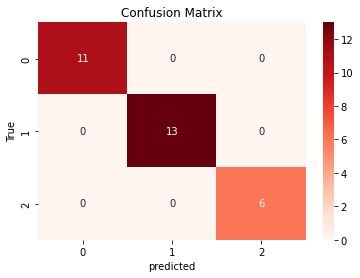

In [ ]:
Y_predicted = KNN.predict(X_test)
cm = confusion_matrix(Y_test,Y_predicted)
sns.heatmap(cm,annot=True,cmap='Reds')
plt.xlabel('predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [ ]:
print(classification_report(Y_test,Y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
KNN.predict([[4.8,3.0,1.5,0.3]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

####**Excersice on KNN**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df['target'] = digits.target

In [ ]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
X = df.drop(['target'],axis=1)
Y = df['target']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)
KNN.score(X_test,Y_test)

0.9944444444444445

Text(0.5, 1.0, 'Confusion Matrix')

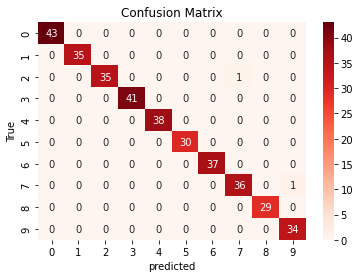

In [ ]:
Y_predicted = KNN.predict(X_test)
cm = confusion_matrix(Y_test,Y_predicted)
sns.heatmap(cm,annot=True,cmap='Reds')
plt.xlabel('predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [ ]:
print(classification_report(Y_test,Y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      0.97      0.99        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        37
           7       0.97      0.97      0.97        37
           8       1.00      1.00      1.00        29
           9       0.97      1.00      0.99        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



###**Principal Component Analysis**
Reduces the dimentions in order to get the important features from the dataset without altering the accuracy

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df['target'] = digits.target

In [ ]:
digits.data[4].reshape(8,8)

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

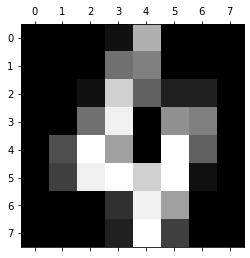

In [ ]:
plt.gray()
plt.matshow(digits.data[4].reshape(8,8))

In [ ]:
X = df.drop(['target'],axis=1)
Y = df['target']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
len(X_train)

1437

In [ ]:
model = LogisticRegression(max_iter=20000)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9722222222222222

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_scaled = s.fit_transform(X)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=1)

In [ ]:
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9666666666666667

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [ ]:
pca.n_components_

29

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_pca,Y,test_size=0.2,random_state=1)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9638888888888889

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 10)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_pca,Y,test_size=0.2,random_state=1)

In [ ]:
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.925

####**Excercersice on PCA**

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/heart_disease.csv'))

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [ ]:
X = df.drop(['HeartDisease'],axis=1)
Y = df['HeartDisease']

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(918, 2)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_pca,Y,test_size=0.2,random_state=1)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.6630434782608695

In [ ]:
X_pca = pca.fit_transform(X)

###**Bias and Variance**
If the test error changes after changing the X_train and Y_train then it is having a high variance(More variation in the test errors) and if it is having less Bias

If the test error and the train error is almost the same then it is having a high bias and less variance as there is less variation in the change in the error


###**Ensemble Learning**

Ensemble learning is used to tackle the high variance in the model

Here we take the samples of the data with sampling with replacement such that the number which occured will occur again and take N number of these samples and do the model analyis and we take majority of the output as the output similar to the random forest but the approach is going to be different in sampling the data

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Practice/pregnency.csv'))

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
268/500

0.536

In [ ]:
X = df.drop(['Outcome'],axis=1)
Y = df.Outcome

In [ ]:
standardscalar = StandardScaler()
X_scaled = standardscalar.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, stratify=Y, random_state=10)

In [ ]:
y_test.value_counts()

0    125
1     67
Name: Outcome, dtype: int64

In [ ]:
67/125

0.536

In [ ]:
scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)
scores.mean()

0.7049025487256373

In [ ]:
scores = cross_val_score(RandomForestClassifier(n_estimators=50), X_train, y_train, cv=5)
scores.mean()

0.7587706146926536

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.7534722222222222

In [ ]:
bag_model.score(X_test, y_test)

0.7760416666666666

In [ ]:
scores = cross_val_score(bag_model, X_train, y_train, cv=5)
scores.mean()

0.7552773613193403